In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

In [2]:
x = np.arange(58.1, 71.96, 0.05)
y = np.array([12, 10, 16, 18, 13, 14, 15, 21, 26, 16, 16, 16, 15, 15, 31, 22, 23, 22, 23, 31, 31, 36, 29, 30, 44, 43, 45, 39, 67, 67, 62, 83, 79, 92, 93, 128, 177, 187, 251, 289, 334, 414, 509, 549, 623, 680, 751, 769, 816, 742, 701, 721, 599, 540, 498, 425, 339, 293, 212, 172, 157, 142, 115, 95, 84, 86, 81, 78, 58, 47, 52, 62, 47, 44, 39, 44, 50, 34, 28, 36, 36, 28, 34, 24, 28, 28, 37, 40, 33, 45, 44, 32, 32, 47, 41, 46, 41, 56, 46, 50, 59, 71, 72, 63, 62, 77, 89, 62, 93, 96, 114, 97, 123, 140, 137, 146, 138, 187, 213, 219, 239, 255, 287, 314, 336, 386, 401, 434, 467, 499, 534, 635, 597, 588, 597, 671, 725, 693, 751, 759, 727, 758, 763, 720, 706, 655, 650, 595, 608, 565, 522, 511, 433, 499, 448, 387, 371, 365, 324, 312, 326, 306, 292, 266, 282, 238, 265, 278, 242, 209, 226, 254, 236, 233, 232, 225, 220, 205, 209, 234, 214, 234, 234, 205, 194, 223, 201, 226, 214, 234, 241, 226, 269, 272, 303, 261, 272, 277, 284, 308, 324, 286, 307, 329, 281, 280, 257, 227, 239, 234, 221, 181, 195, 190, 164, 158, 131, 118, 118, 106, 108, 70, 104, 74, 76, 70, 52, 57, 56, 36, 44, 40, 48, 40, 33, 23, 28, 25, 24, 20, 20, 24, 31, 19, 23, 24, 15, 18, 12, 14, 11, 14, 14, 21, 20, 14, 12, 10, 11, 13, 5, 14, 11, 10, 11, 8, 8, 6, 10, 5, 11, 13, 8, 14, 6, 8, 3, 7])

https://stackoverflow.com/questions/77807226/scipy-optimize-curve-fit-does-not-fit-properly

In [3]:
def peak(x, alpha, A, x0, s, b):
    return A * (
        (1 - alpha)*(1 / (s * (np.sqrt(2 * np.pi)))) * np.exp(-0.5 * np.power((x - x0) / s, 2)) + \
        alpha / np.pi * (s / (np.power((x - x0), 2) + np.power(s, 2)))
    ) + b

def model(x, alpha1, A1, x01, s1, alpha2, A2, x02, s2, alpha3, A3, x03, s3, b):
    return (
          peak(x, alpha1, A1, x01, s1, b)
        + peak(x, alpha2, A2, x02, s2, b)
        + peak(x, alpha3, A3, x03, s3, b)
    )

In [4]:
bounds_min = [
    0, 0, 60, 0,
    0, 0, 64, 0,
    0, 0, 67, 0,
    -10,
]
bounds_max = [
    1, np.inf, 62, 2,
    1, np.inf, 66, 2,
    1, np.inf, 70, 2,
    10.,
]

alpha1, A1, x01, s1 = 0.5, 600, 60.4, 1
alpha2, A2, x02, s2 = 0.5, 1000, 64.9, 1
alpha3, A3, x03, s3 = 0.5, 350, 68.3, 0.7

p0 = [
    alpha1, A1, x01, s1,
    alpha2, A2, x02, s2,
    alpha3, A3, x03, s3,  
]

p0 = [
    5.10442033e-01, 7.00127080e+02, 6.04952879e+01, 3.21730995e-01,
    6.72779986e-01, 1.54345195e+03, 6.51267584e+01, 7.25269574e-01,
    2.02872332e-01, 5.77649099e+02, 6.80000000e+01, 8.64038336e-01,
]

In [5]:
popt, pcov = optimize.curve_fit(
    model, x, y,
    bounds=(bounds_min, bounds_max)
)

In [6]:
popt

array([5.47454610e-01, 7.11445399e+02, 6.04956408e+01, 3.22783279e-01,
       6.07553375e-01, 1.48345124e+03, 6.51134457e+01, 7.05897429e-01,
       2.90916120e-02, 5.87380342e+02, 6.78878208e+01, 9.19652025e-01,
       1.40132572e-01])

In [7]:
spopt = np.sqrt(np.diag(pcov))
spopt

array([6.05066501e-02, 1.85176731e+01, 3.53344668e-03, 4.63401020e-03,
       5.19141134e-02, 3.55510240e+01, 6.92554480e-03, 9.06962755e-03,
       2.10375861e-01, 4.68867800e+01, 2.27484940e-02, 2.59674755e-02,
       1.40291058e+00])

In [8]:
rsd = spopt / popt
rsd

array([1.10523592e-01, 2.60282421e-02, 5.84082859e-05, 1.43564134e-02,
       8.54478232e-02, 2.39650775e-02, 1.06361209e-04, 1.28483646e-02,
       7.23149551e+00, 7.98235431e-02, 3.35089472e-04, 2.82361968e-02,
       1.00113097e+01])

In [9]:
xlin = np.linspace(x.min(), x.max(), 500)
yhat = model(xlin, *popt)

In [10]:
score = r2_score(y, model(x, *popt))
score

0.9918069181541809

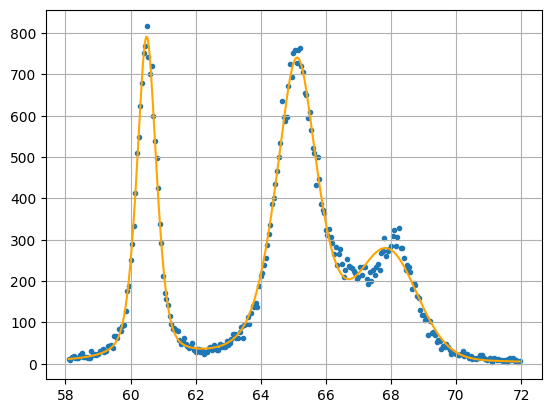

In [11]:
fig, axe = plt.subplots()
axe.scatter(x, y, marker=".")
#axe.plot(xlin, peak(xlin, *popt[0:4]), "--", color="gray")
#axe.plot(xlin, peak(xlin, *popt[4:8]), "--", color="gray")
#axe.plot(xlin, peak(xlin, *popt[8:12]), "--", color="gray")
axe.plot(xlin, yhat, color="orange")
axe.grid()